# PT-BR

## Análise dos salários dos fucionários públicos do estado de São Paulo em Outubro de 2017

Esse é um estudo introdutório com o único intuito de treinar minhas habilidades pessoais de análise de dados utilizando dataframes disponíveis no site Keggle. Este em questão foi feito por Luiz Gustavo Modelli e está disponível em sua totalidade em: https://www.kaggle.com/gustavomodelli/monthly-salary-of-public-worker-in-brazil

Utilizei apenas 1000 linhas dentre as disponíveis no dataframe como amostra e fiz os métodos que achei mais adequados para a apresentação dos mesmos.

Lembro que a utilização de qualquer uma das análises deste documento deverá mencionar o autor do mesmo.

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Introdução

Inicaremos fazendo a leitura do arquivo CSV

In [95]:
df = pd.read_csv('D:\Gabriel\DM\Treinamentos\Análise de dados\Public_agents_salary\monthly_salary_brazil.csv', engine= 'python')

Agora, trarei os 5 primeiros registros, afim de ver a organização do dataframe

In [96]:
df.head()

,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
0,1,OFICIAL ADMINISTRATIVO,DETRAN,2315.81,0.0,0.0,0.0,73.85,0.0,1929.34
1,2,SD 2C PM,PM,3034.05,0.0,0.0,0.0,651.82,0.0,2265.96
2,3,1TEN PM,PM,8990.98,0.0,0.0,0.0,626.75,0.0,6933.04
3,4,MAJ PM,SPPREV,13591.02,0.0,0.0,0.0,0.00,0.0,10568.36
4,5,AG.TEC. DE ASSIT. A SAUDE,HCFMUSP,4203.67,0.0,0.0,0.0,0.00,0.0,3561.88


Uma das limpezas será apagar as informações duplicadas usando o "drop_duplicates()"

In [97]:
df.drop_duplicates()

,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
0,1,OFICIAL ADMINISTRATIVO,DETRAN,2315.81,0.0,0.00,0.0,73.85,0.0,1929.34
1,2,SD 2C PM,PM,3034.05,0.0,0.00,0.0,651.82,0.0,2265.96
2,3,1TEN PM,PM,8990.98,0.0,0.00,0.0,626.75,0.0,6933.04
3,4,MAJ PM,SPPREV,13591.02,0.0,0.00,0.0,0.00,0.0,10568.36
4,5,AG.TEC. DE ASSIT. A SAUDE,HCFMUSP,4203.67,0.0,0.00,0.0,0.00,0.0,3561.88
...,...,...,...,...,...,...,...,...,...,...
994,995,BENEFICIARIO DE SERVIDOR ESTADUAL-IPESP,SPPREV,715.06,0.0,715.06,0.0,0.00,0.0,1430.12
995,996,1SGT PM,SPPREV,6475.44,0.0,0.00,0.0,0.00,0.0,3679.13
996,997,AG.SEG.PENITENC.CLASSE VI,SAP,6008.76,0.0,720.00,0.0,0.00,0.0,4646.82
997,998,SD 2C PM,PM,3034.05,0.0,0.00,0.0,501.40,0.0,3081.31


Agora vamos apagar a coluna id poque não será necessária ao nosso estudo.

In [98]:
df.drop(columns='Id', inplace=True)

É importante fazer uma requisição com as informações principais do dataframe, assim teremos uma ideia dos tipos de dados com que estamos lidando

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job              999 non-null    object 
 1   sector           999 non-null    object 
 2   Month_salary     999 non-null    float64
 3   13_salary        999 non-null    float64
 4   eventual_salary  999 non-null    float64
 5   indemnity        999 non-null    float64
 6   extra_salary     999 non-null    float64
 7   discount_salary  999 non-null    float64
 8   total_salary     997 non-null    float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB


In [105]:
df.groupby(['sector'])['job'].count()

sector
ADM GERAL      49
CDHU            2
CEETEPS        13
CPTM           12
DAEE            5
DAESP           1
DER             3
DETRAN          2
EDUCACAO      142
FAZENDA         7
FDE             1
FUND. CASA      7
FURP            1
HCFMRP          3
HCFMUSP        11
IMESP           1
IPT             1
ITESP           2
MEIO AMBIE      1
METRO          10
PGE             1
PM             87
PROCON          1
PRODESP         2
SAA             4
SABESP         18
SAP            42
SAUDE          31
SDS             1
SECRETARIA      2
SPPREV        498
SSP            35
SUCEN           1
UNIVESP         1
ZOOLOGICO       1
Name: job, dtype: int64

## SALARIOS

### Salário mensal

A primeira bateria de estudos será sobre o salário mensal, quero descobrir o maior e o menor salário mensal, além das informações sobre o(s) cargo(s) correspondentes da pesquisa

In [100]:
df['Month_salary'].max()

64854.79

In [101]:
df[df['Month_salary'] == df['Month_salary'].max()]

,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
305,ARQUITETO VI,DAEE,64854.79,0.0,0.0,0.0,0.0,-43223.74,16287.81


In [102]:
df['Month_salary'].min()

0.0

In [103]:
df[df['Month_salary'] == df['Month_salary'].min()]


,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
191,MEDICO I,SAUDE,0.0,0.00,0.00,0.0,0.0,0.0,0.0
346,AGENTE DE AP SOCIOEDUCAT II,FUND. CASA,0.0,5059.88,202.37,0.0,0.0,0.0,0.0


Agora veremos os 5 maiores salários mensais do estado.

In [104]:
df.sort_values(by='Month_salary',ascending=False).head(5)

,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
305,ARQUITETO VI,DAEE,64854.79,0.00,0.00,0.0,0.00,-43223.74,16287.81
758,AGENTE FISCAL DE RENDAS,SPPREV,43469.76,10815.52,13833.90,0.0,0.00,-21838.71,32339.74
691,AGENTE FISCAL DE RENDAS,FAZENDA,41646.79,0.00,739.11,0.0,2460.71,-20015.74,15236.64
675,AGENTE FISCAL DE RENDAS,SPPREV,37764.37,0.00,15740.35,0.0,0.00,-16133.32,20824.74
845,AGENTE FISCAL DE RENDAS,SPPREV,36609.31,0.00,13211.87,0.0,0.00,-14978.26,32107.09


In [136]:
df['Month_salary'].mean()

4726.6824824824835

Text(0.5, 0, 'Salário mensal')

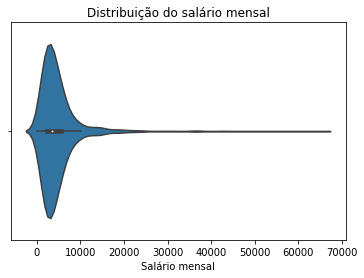

In [147]:
sns.violinplot(x=df['Month_salary'])
plt.title('Distribuição do salário mensal')
plt.xlabel('Salário mensal')

### Salário Total

Agora partiremos para o salário total, ou seja, o salário final do servidor, bem como seu cargo.

In [42]:
df['total_salary'].max()

33574.49

In [44]:
df[df['total_salary'] == df['total_salary'].max()]

,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
652,653,MAJ PM,PM,14061.47,11172.56,-49.72,13812.85,401.12,0.0,33574.49


In [59]:
df['total_salary'].min()

0.0

In [60]:
df[df['total_salary'] == df['total_salary'].min()]

,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
98,COMPLEMENTACAO APOSENTADORIA,DAEE,1226.98,0.00,0.00,0.0,0.0,0.0,0.0
179,TECNICO EM GESTAO 09,SABESP,1879.29,0.00,2435.63,0.0,0.0,0.0,0.0
191,MEDICO I,SAUDE,0.00,0.00,0.00,0.0,0.0,0.0,0.0
346,AGENTE DE AP SOCIOEDUCAT II,FUND. CASA,0.00,5059.88,202.37,0.0,0.0,0.0,0.0
596,AUXILIAR DE ENFERMAGEM,SAUDE,1289.97,0.00,167.68,0.0,0.0,0.0,0.0


In [71]:
df.sort_values(by='total_salary',ascending=False).head(5)

,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
652,MAJ PM,PM,14061.47,11172.56,-49.72,13812.85,401.12,0.00,33574.49
758,AGENTE FISCAL DE RENDAS,SPPREV,43469.76,10815.52,13833.90,0.00,0.00,-21838.71,32339.74
845,AGENTE FISCAL DE RENDAS,SPPREV,36609.31,0.00,13211.87,0.00,0.00,-14978.26,32107.09
892,AGENTE FISCAL DE RENDAS,SPPREV,29982.08,10815.52,10167.51,0.00,0.00,-8351.03,29436.75
72,AGENTE FISCAL DE RENDAS,SPPREV,35390.44,0.00,11559.89,0.00,0.00,-13759.39,23459.08


In [113]:
df['total_salary'].mean()

3693.339558676028

Text(0.5, 0, 'Salário total')

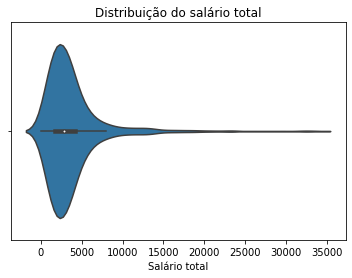

In [148]:
sns.violinplot(x=df['total_salary'])
plt.title('Distribuição do salário total')
plt.xlabel('Salário total')

Ainda dentro dos salários, traremos os maiores e menores pagamentos extras, um a um, sendo eles 13º Salário, Salário eventual, salário extra, indenizações e descontos.

In [62]:
df['13_salary'].max()

20800.19

In [64]:
df[df['13_salary'] == df['13_salary'].max()]

,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
864,ENGENHEIRO,METRO,8614.42,20800.19,1281.71,0.0,0.0,0.0,21262.72


A maior indenização:

In [106]:
df['indemnity'].max()

13812.85

Com um simples comando podemos ver que o estado de são paulo pagou **R$ 3 682 259,54** (mais de 3 milhões de reais em salários)

In [140]:
df['total_salary'].sum()

3682259.54

Text(0, 0.5, 'Setor')

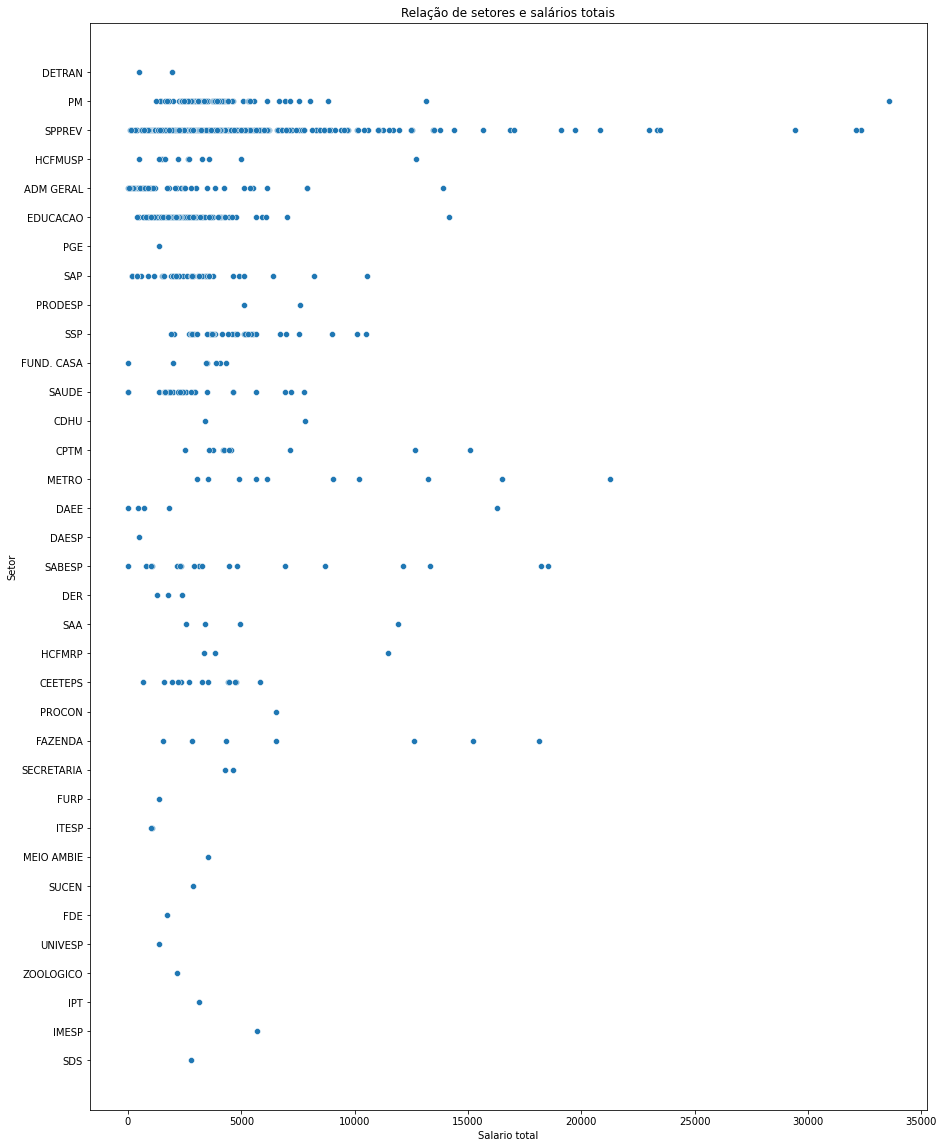

In [161]:
plt.figure(figsize=(15, 20))
sns.scatterplot(x='total_salary', y='sector', data=df)
plt.title('Relação de setores e salários totais')
plt.xlabel('Salario total')
plt.ylabel('Setor')